In [1]:
import sklearn
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import matplotlib.pyplot as plt

from nnlocallinear import NLS, LLS

In [2]:
from ExplainText import ExplainText

# Preparing data

In [3]:
categories = ['alt.atheism', 'soc.religion.christian']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)
class_names = ['atheism', 'christian']
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(lowercase=False)
train_vectors = vectorizer.fit_transform(newsgroups_train.data)
test_vectors = vectorizer.transform(newsgroups_test.data)
train_vectors = train_vectors.toarray()
test_vectors = test_vectors.toarray()

In [4]:
names_features = np.array(vectorizer.get_feature_names())

In [5]:
len(vectorizer.get_feature_names())

23035

# Training the NLS

In [6]:
parameters = {
        'model__es_give_up_after_nepochs': [20]
        , 'model__hidden_size': [100, 250, 500]
        , 'model__num_layers': [1, 3, 5]
    }

comb_parameters = [{
        'es_give_up_after_nepochs': 20
        , 'hidden_size': 20
        , 'num_layers': 1
        , 'n_classification_labels': 2,

    }
        ]

In [7]:

for parameter in comb_parameters:
    model = NLS(
        verbose=0
        , es=True
        , gpu=True
        , scale_data=False
        , varying_theta0=False
        , fixed_theta0=True
        , dataloader_workers=0
        # , with_mean=False
        , **parameter
    ) 
    model.fit(x_train=train_vectors, y_train=newsgroups_train.target)

## Testing model

In [9]:
test_vectors = test_vectors
pred = model.predict(test_vectors)
print('Score:', sklearn.metrics.f1_score(newsgroups_test.target, pred, average='binary'))

Score: 0.9541062801932367


# Explaining a Document

In [10]:
idx = 83
# newsgroups_test.data[idx]
print('Document id: %d' % idx)
# print(model.predict(test_vectors))
print('Probability(christian) =', model.predict_proba([test_vectors[idx]]))

print('True class: %s' % class_names[newsgroups_test.target[idx]])
print('True class number:',newsgroups_test.target[idx] )
print('Text:')
print(newsgroups_test.data[idx])
x_explain = test_vectors[idx].reshape(1, -1)
document_explain = newsgroups_test.data[idx]

Document id: 83
Probability(christian) = [[0.64883035 0.3511697 ]]
True class: atheism
True class number: 0
Text:
From: johnchad@triton.unm.edu (jchadwic)
Subject: Another request for Darwin Fish
Organization: University of New Mexico, Albuquerque
Lines: 11
NNTP-Posting-Host: triton.unm.edu

Hello Gang,

There have been some notes recently asking where to obtain the DARWIN fish.
This is the same question I have and I have not seen an answer on the
net. If anyone has a contact please post on the net or email me.

Thanks,

john chadwick
johnchad@triton.unm.edu
or



# Generating an Explanation

In [13]:
exp = ExplainText(model, class_names=['atheism', 'christian'], names_features=names_features)
# dict_exp = exp.get_text_explanation(x_explain, document=document_explain)

[-0.01146053 -0.0625377  -0.05339154 ... -0.00248547 -0.01882945
 -0.05363263]


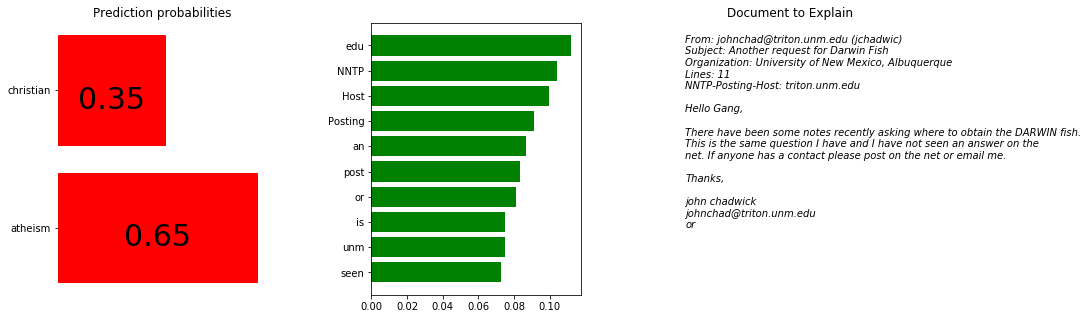

In [14]:
plot_exp = exp.explain_graphical(x_explain, document=document_explain)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)